In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("buys_comp.csv")

In [ ]:
data.head()

,id,age,income,student,credit_rating,Buy_Computer
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,31...40,high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,fair,yes


In [ ]:
data.drop("id",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

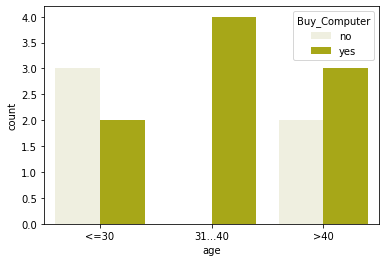

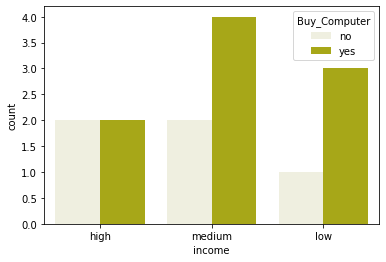

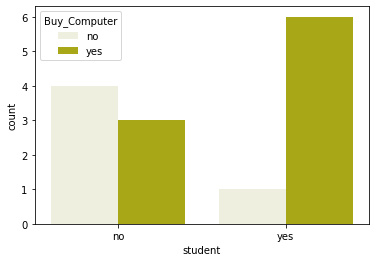

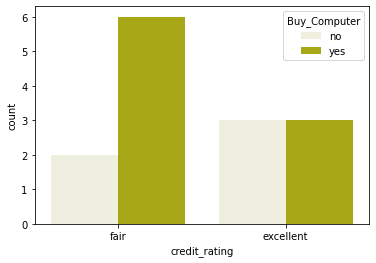

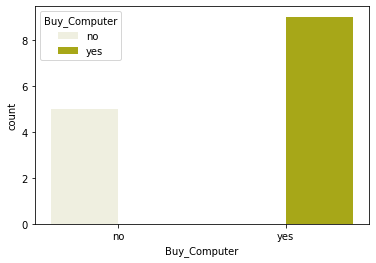

In [ ]:
for i in data:
  plt.figure()
  sns.countplot(data[i],hue=data["Buy_Computer"],color='y')

In [ ]:
data.head()

,age,income,student,credit_rating,Buy_Computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for i in data:
  data[i]=le.fit_transform(data[i])

In [ ]:
data.head()

,age,income,student,credit_rating,Buy_Computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1


In [ ]:
y=data['Buy_Computer']
x=data.drop(['Buy_Computer'],axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
model1=DecisionTreeClassifier(max_depth=9)

In [ ]:
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=9)

[Text(0.3333333333333333, 0.9, 'X[0] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

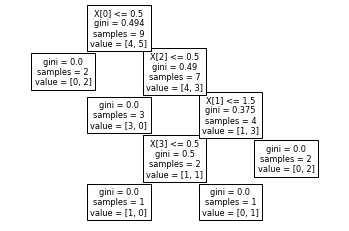

In [ ]:
from sklearn import tree

tree.plot_tree(model1)

In [ ]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=9)

In [ ]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

[Text(0.3333333333333333, 0.9, 'X[0] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

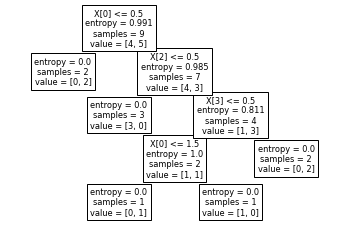

In [ ]:
tree.plot_tree(model2)

In [ ]:
print(model1.score(xtest,ytest)*100)
print(model2.score(xtest,ytest)*100)

80.0
80.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


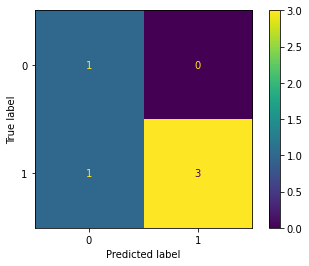

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1,xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


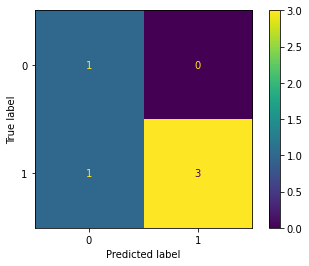

In [ ]:
plot_confusion_matrix(model2,xtest,ytest)